# Multiple, Lasso, and Ridge Regression on Insurance Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
df = pd.read_csv('insurance.csv')
print("Shape:", df.shape)
df.head(10)

Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Total missing values: 0


## Data Preprocessing

In [6]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

categorical_cols = ['sex', 'smoker', 'region']
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"\n{col}: {list(le.classes_)}")

df_encoded.head()

Categorical columns: ['sex', 'smoker', 'region']

sex: ['female', 'male']

smoker: ['no', 'yes']

region: ['northeast', 'northwest', 'southeast', 'southwest']


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


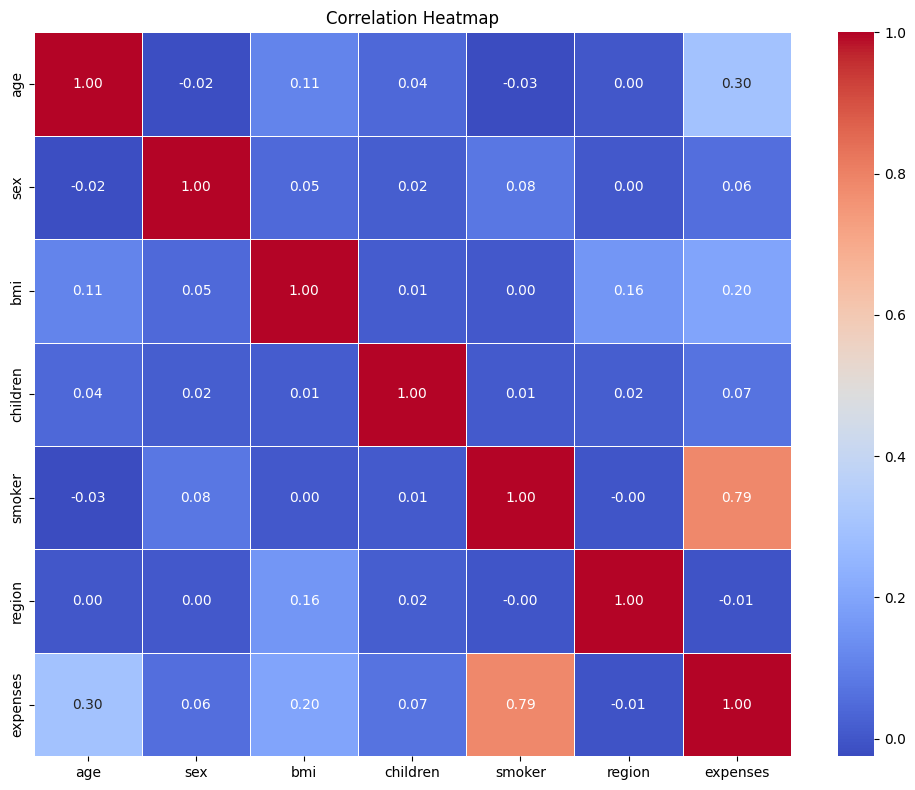

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [8]:
# Prepare features and target
X = df_encoded.drop(columns=['expenses'])
y = df_encoded['expenses']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size:     {X_test.shape[0]}")
print(f"\nFeatures: {list(X.columns)}")

Training set size: 1070
Test set size:     268

Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [9]:
# Feature Scaling (required for Lasso and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## 1. Multiple Linear Regression
Standard linear regression using all features to predict insurance expenses.

In [10]:
# Train Multiple Linear Regression Model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
y_pred_mlr = mlr_model.predict(X_test)

# Evaluation Metrics
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("=== Multiple Linear Regression Results ===")
print(f"Mean Absolute Error (MAE) : ${mae_mlr:.2f}")
print(f"Mean Squared Error (MSE)  : ${mse_mlr:.2f}")
print(f"Root Mean Squared Error   : ${rmse_mlr:.2f}")
print(f"R² Score                  : {r2_mlr:.4f}")

# Feature Coefficients
print("\nFeature Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients.to_string(index=False))

=== Multiple Linear Regression Results ===
Mean Absolute Error (MAE) : $4186.94
Mean Squared Error (MSE)  : $33639075.09
Root Mean Squared Error   : $5799.92
R² Score                  : 0.7833

Feature Coefficients:
 Feature  Coefficient
  smoker 23646.927259
children   425.463175
     bmi   335.939380
     age   257.038298
     sex   -18.704810
  region  -271.222476


---
## 2. Lasso Regression (L1 Regularization)
Lasso adds L1 penalty to prevent overfitting and performs feature selection.

In [11]:
# Hyperparameter tuning for Lasso using GridSearchCV
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000, random_state=42), 
                          lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

print(f"Best alpha for Lasso: {lasso_grid.best_params_['alpha']}")
print(f"Best CV R² Score: {lasso_grid.best_score_:.4f}")

Best alpha for Lasso: 100
Best CV R² Score: 0.7344


In [12]:
# Train Lasso Regression Model with best alpha
lasso_model = lasso_grid.best_estimator_

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation Metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== Lasso Regression Results ===")
print(f"Alpha: {lasso_model.alpha}")
print(f"Mean Absolute Error (MAE) : ${mae_lasso:.2f}")
print(f"Mean Squared Error (MSE)  : ${mse_lasso:.2f}")
print(f"Root Mean Squared Error   : ${rmse_lasso:.2f}")
print(f"R² Score                  : {r2_lasso:.4f}")

# Feature Coefficients
print("\nFeature Coefficients:")
coefficients_lasso = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients_lasso.to_string(index=False))
print(f"\nNumber of features with non-zero coefficients: {np.sum(lasso_model.coef_ != 0)}")

=== Lasso Regression Results ===
Alpha: 100
Mean Absolute Error (MAE) : $4196.11
Mean Squared Error (MSE)  : $33893237.62
Root Mean Squared Error   : $5821.79
R² Score                  : 0.7817

Feature Coefficients:
 Feature  Coefficient
  smoker  9453.620210
     age  3526.998952
     bmi  1919.379954
children   424.418558
     sex     0.000000
  region  -184.392057

Number of features with non-zero coefficients: 5


---
## 3. Ridge Regression (L2 Regularization)
Ridge adds L2 penalty to reduce model complexity and prevent overfitting.

In [13]:
# Hyperparameter tuning for Ridge using GridSearchCV
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(Ridge(random_state=42), 
                         ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

print(f"Best alpha for Ridge: {ridge_grid.best_params_['alpha']}")
print(f"Best CV R² Score: {ridge_grid.best_score_:.4f}")

Best alpha for Ridge: 10
Best CV R² Score: 0.7340


In [14]:
# Train Ridge Regression Model with best alpha
ridge_model = ridge_grid.best_estimator_

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluation Metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== Ridge Regression Results ===")
print(f"Alpha: {ridge_model.alpha}")
print(f"Mean Absolute Error (MAE) : ${mae_ridge:.2f}")
print(f"Mean Squared Error (MSE)  : ${mse_ridge:.2f}")
print(f"Root Mean Squared Error   : ${rmse_ridge:.2f}")
print(f"R² Score                  : {r2_ridge:.4f}")

# Feature Coefficients
print("\nFeature Coefficients:")
coefficients_ridge = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients_ridge.to_string(index=False))

=== Ridge Regression Results ===
Alpha: 10
Mean Absolute Error (MAE) : $4201.97
Mean Squared Error (MSE)  : $33713678.75
Root Mean Squared Error   : $5806.35
R² Score                  : 0.7828

Feature Coefficients:
 Feature  Coefficient
  smoker  9465.989183
     age  3579.591897
     bmi  2013.429980
children   515.636141
     sex    -2.840933
  region  -297.083235


---
## Model Comparison

In [15]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Multiple Linear', 'Lasso', 'Ridge'],
    'MAE': [mae_mlr, mae_lasso, mae_ridge],
    'RMSE': [rmse_mlr, rmse_lasso, rmse_ridge],
    'R² Score': [r2_mlr, r2_lasso, r2_ridge]
})

print("=== Model Comparison ===")
print(comparison.to_string(index=False))
print(f"\nBest Model (by R² Score): {comparison.loc[comparison['R² Score'].idxmax(), 'Model']}")

=== Model Comparison ===
          Model         MAE        RMSE  R² Score
Multiple Linear 4186.940106 5799.920266  0.783321
          Lasso 4196.113148 5821.789898  0.781684
          Ridge 4201.971291 5806.348142  0.782841

Best Model (by R² Score): Multiple Linear


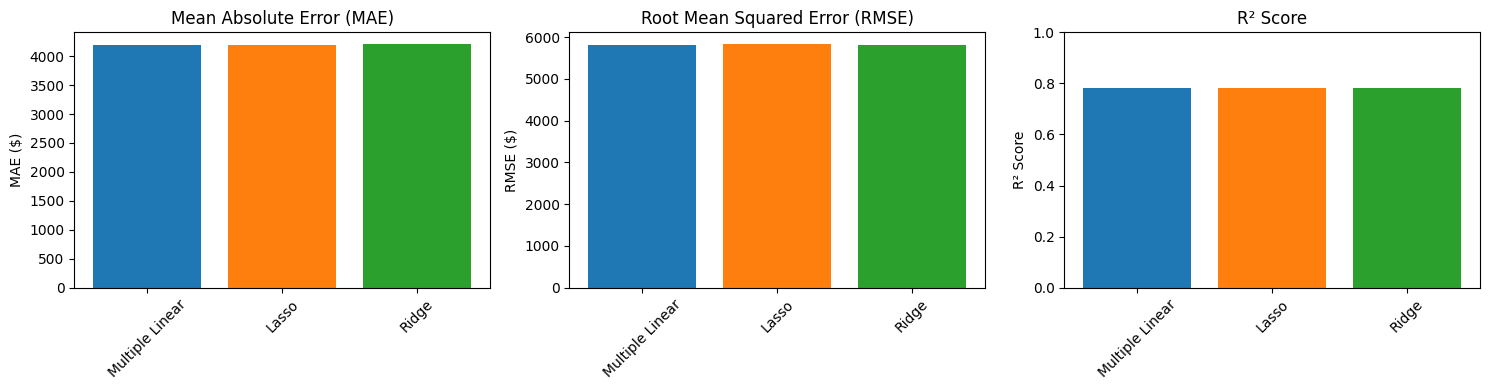

In [16]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# MAE Comparison
axes[0].bar(comparison['Model'], comparison['MAE'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE ($)')
axes[0].tick_params(axis='x', rotation=45)

# RMSE Comparison
axes[1].bar(comparison['Model'], comparison['RMSE'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE ($)')
axes[1].tick_params(axis='x', rotation=45)

# R² Score Comparison
axes[2].bar(comparison['Model'], comparison['R² Score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()

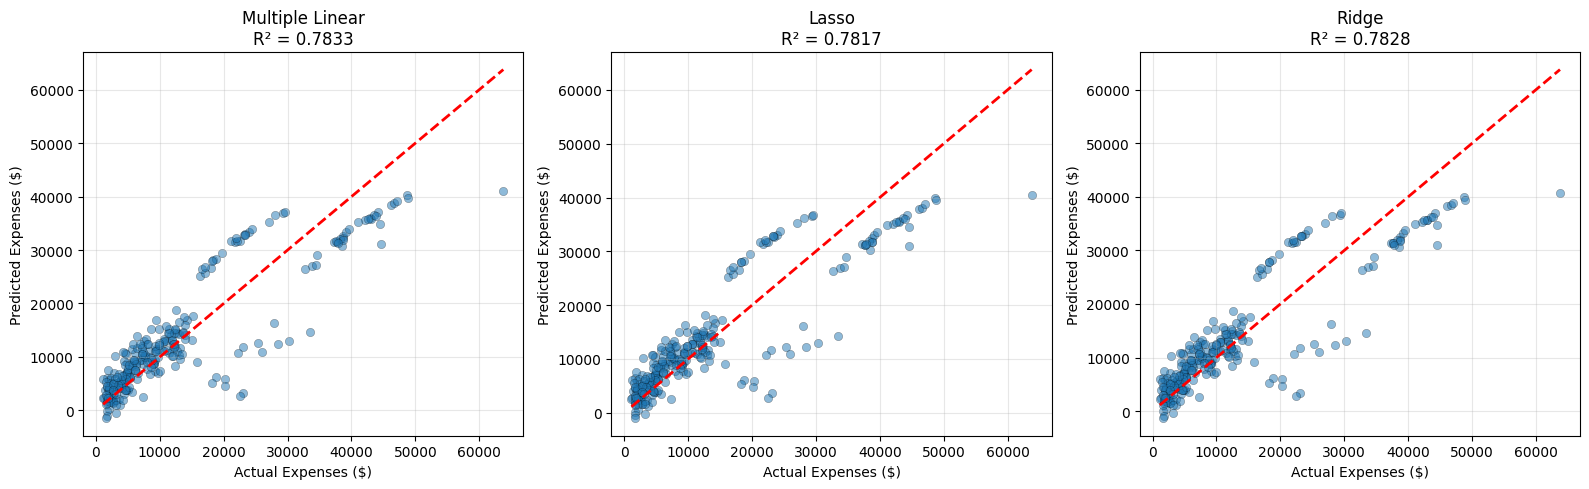

In [17]:
# Actual vs Predicted for all models
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models_pred = [
    ('Multiple Linear', y_pred_mlr, r2_mlr),
    ('Lasso', y_pred_lasso, r2_lasso),
    ('Ridge', y_pred_ridge, r2_ridge)
]

for idx, (name, y_pred, r2) in enumerate(models_pred):
    axes[idx].scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidths=0.3)
    axes[idx].plot([y_test.min(), y_test.max()],
                   [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Expenses ($)')
    axes[idx].set_ylabel('Predicted Expenses ($)')
    axes[idx].set_title(f'{name}\nR² = {r2:.4f}')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## Conclusion

### Summary of Models:

| Model | Description | Regularization |
|---|---|---|
| **Multiple Linear Regression** | Standard linear regression using all features | None |
| **Lasso Regression** | Linear regression with L1 penalty (feature selection) | L1 (can zero out coefficients) |
| **Ridge Regression** | Linear regression with L2 penalty (coefficient shrinkage) | L2 (shrinks coefficients) |

### Key Findings:
- All three models predict insurance expenses based on age, sex, BMI, children, smoker status, and region
- Regularized models (Lasso and Ridge) help prevent overfitting, especially useful with correlated features
- Lasso can perform automatic feature selection by setting some coefficients to zero
- Ridge maintains all features but reduces their impact through coefficient shrinkage
- Model performance is compared using MAE, RMSE, and R² metrics